In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Sample 10% of the data randomly
# sampled_data = data.sample(frac=0.1, random_state=42)  # Use a random state for reproducibility

# Display the shape of the sampled data and the first few rows to confirm the sampling
# sampled_data.shape, sampled_data.head()





In [ ]:
# Read the data file
data = pd.read_csv('/content/drive/MyDrive/sampled_supermarket_churnData.csv')

In [ ]:
data.head()

,row_number,invoice_id,branch,customer_id,gender,age,customer_type,credit_score,has_creditcard,is_active_member,product_category,number_of_products,tax_amount,price,total_amount,ratings,customer_churn
0,6253,574-80-1489,B,15622305,Female,33,Member,746,1,1,Food and beverages,4,12.5700,62.85,263.9700,8.7,0
1,4685,710-46-4433,B,15789546,Male,28,Member,639,1,0,Food and beverages,9,34.8300,77.40,731.4300,4.5,0
2,1732,340-21-9136,A,15595537,Male,49,Member,626,1,0,Sports and travel,4,8.0100,40.05,168.2100,9.7,0
3,4743,288-38-3758,C,15685997,Female,39,Member,838,1,0,Fashion accessories,3,12.7305,84.87,267.3405,7.4,0
4,4522,518-17-2983,A,15656293,Male,35,Normal,786,1,0,Fashion accessories,4,9.7260,48.63,204.2460,7.6,0


In [ ]:
# Remove 'row_number', 'invoice_id', and 'customer_id' from the dataset
data = data.drop(['row_number', 'invoice_id', 'customer_id'], axis=1)

# Display the top 5 rows of the cleaned dataset to confirm removal
data.head()


,branch,gender,age,customer_type,credit_score,has_creditcard,is_active_member,product_category,number_of_products,tax_amount,price,total_amount,ratings,customer_churn
0,B,Female,33,Member,746,1,1,Food and beverages,4,12.5700,62.85,263.9700,8.7,0
1,B,Male,28,Member,639,1,0,Food and beverages,9,34.8300,77.40,731.4300,4.5,0
2,A,Male,49,Member,626,1,0,Sports and travel,4,8.0100,40.05,168.2100,9.7,0
3,C,Female,39,Member,838,1,0,Fashion accessories,3,12.7305,84.87,267.3405,7.4,0
4,A,Male,35,Normal,786,1,0,Fashion accessories,4,9.7260,48.63,204.2460,7.6,0


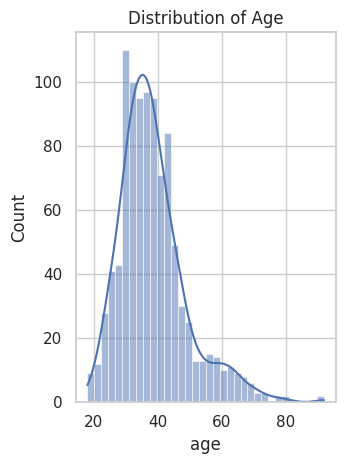

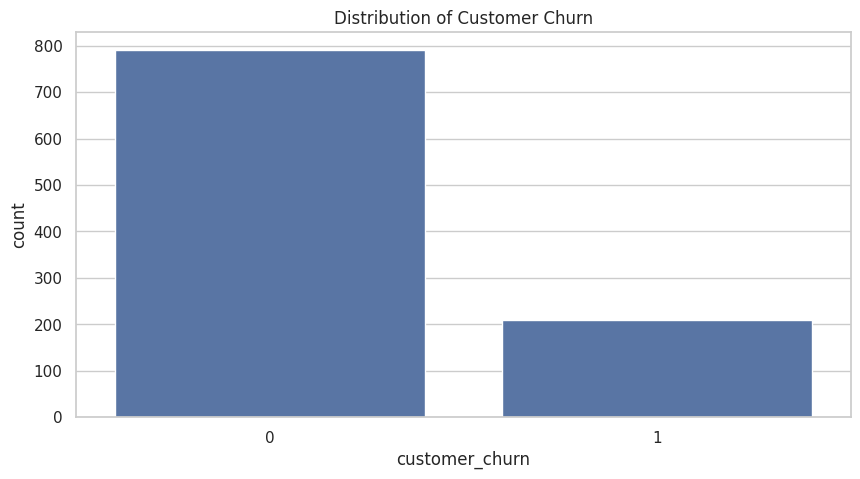

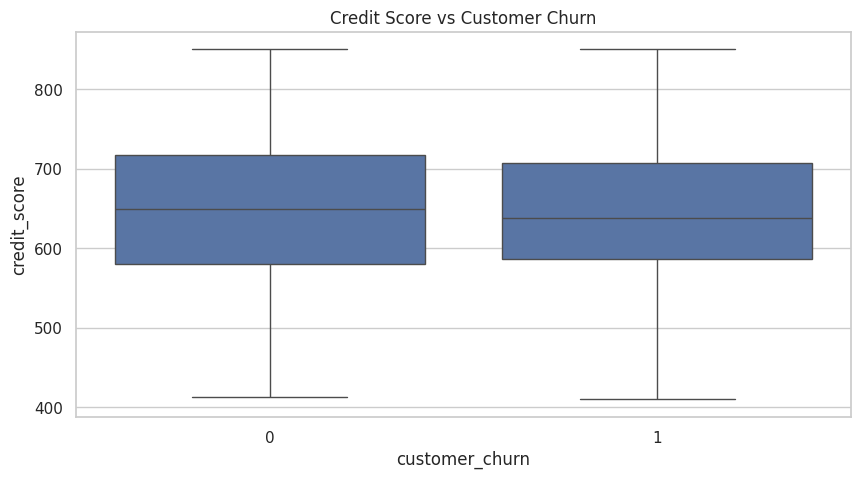

,age,credit_score,has_creditcard,is_active_member,number_of_products,tax_amount,price,total_amount,ratings,customer_churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.482000,647.70000,0.698000,0.522000,5.623000,15.977819,56.362810,335.534199,6.920900,0.210000
std,10.570687,96.36005,0.459355,0.499766,2.884301,11.985139,26.415674,251.687917,1.723753,0.407512
min,18.000000,410.00000,0.000000,0.000000,1.000000,0.627000,10.080000,13.167000,4.000000,0.000000
25%,32.000000,582.75000,0.000000,0.000000,3.000000,5.739250,33.767500,120.524250,5.400000,0.000000
50%,37.000000,649.00000,1.000000,1.000000,6.000000,13.020000,57.170000,273.420000,6.900000,0.000000
75%,43.000000,716.00000,1.000000,1.000000,8.000000,23.094000,78.380000,484.974000,8.400000,0.000000
max,92.000000,850.00000,1.000000,1.000000,10.000000,49.650000,99.960000,1042.650000,10.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Summary statistics for numerical features
summary_statistics = data.describe()



# Distribution of age
plt.subplot(1, 2, 2)
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.tight_layout()

# Distribution of customer churn
plt.figure(figsize=(10, 5))
sns.countplot(x='customer_churn', data=data)
plt.title('Distribution of Customer Churn')

# Boxplot for credit score
plt.figure(figsize=(10, 5))
sns.boxplot(x='customer_churn', y='credit_score', data=data)
plt.title('Credit Score vs Customer Churn')

plt.show()

summary_statistics


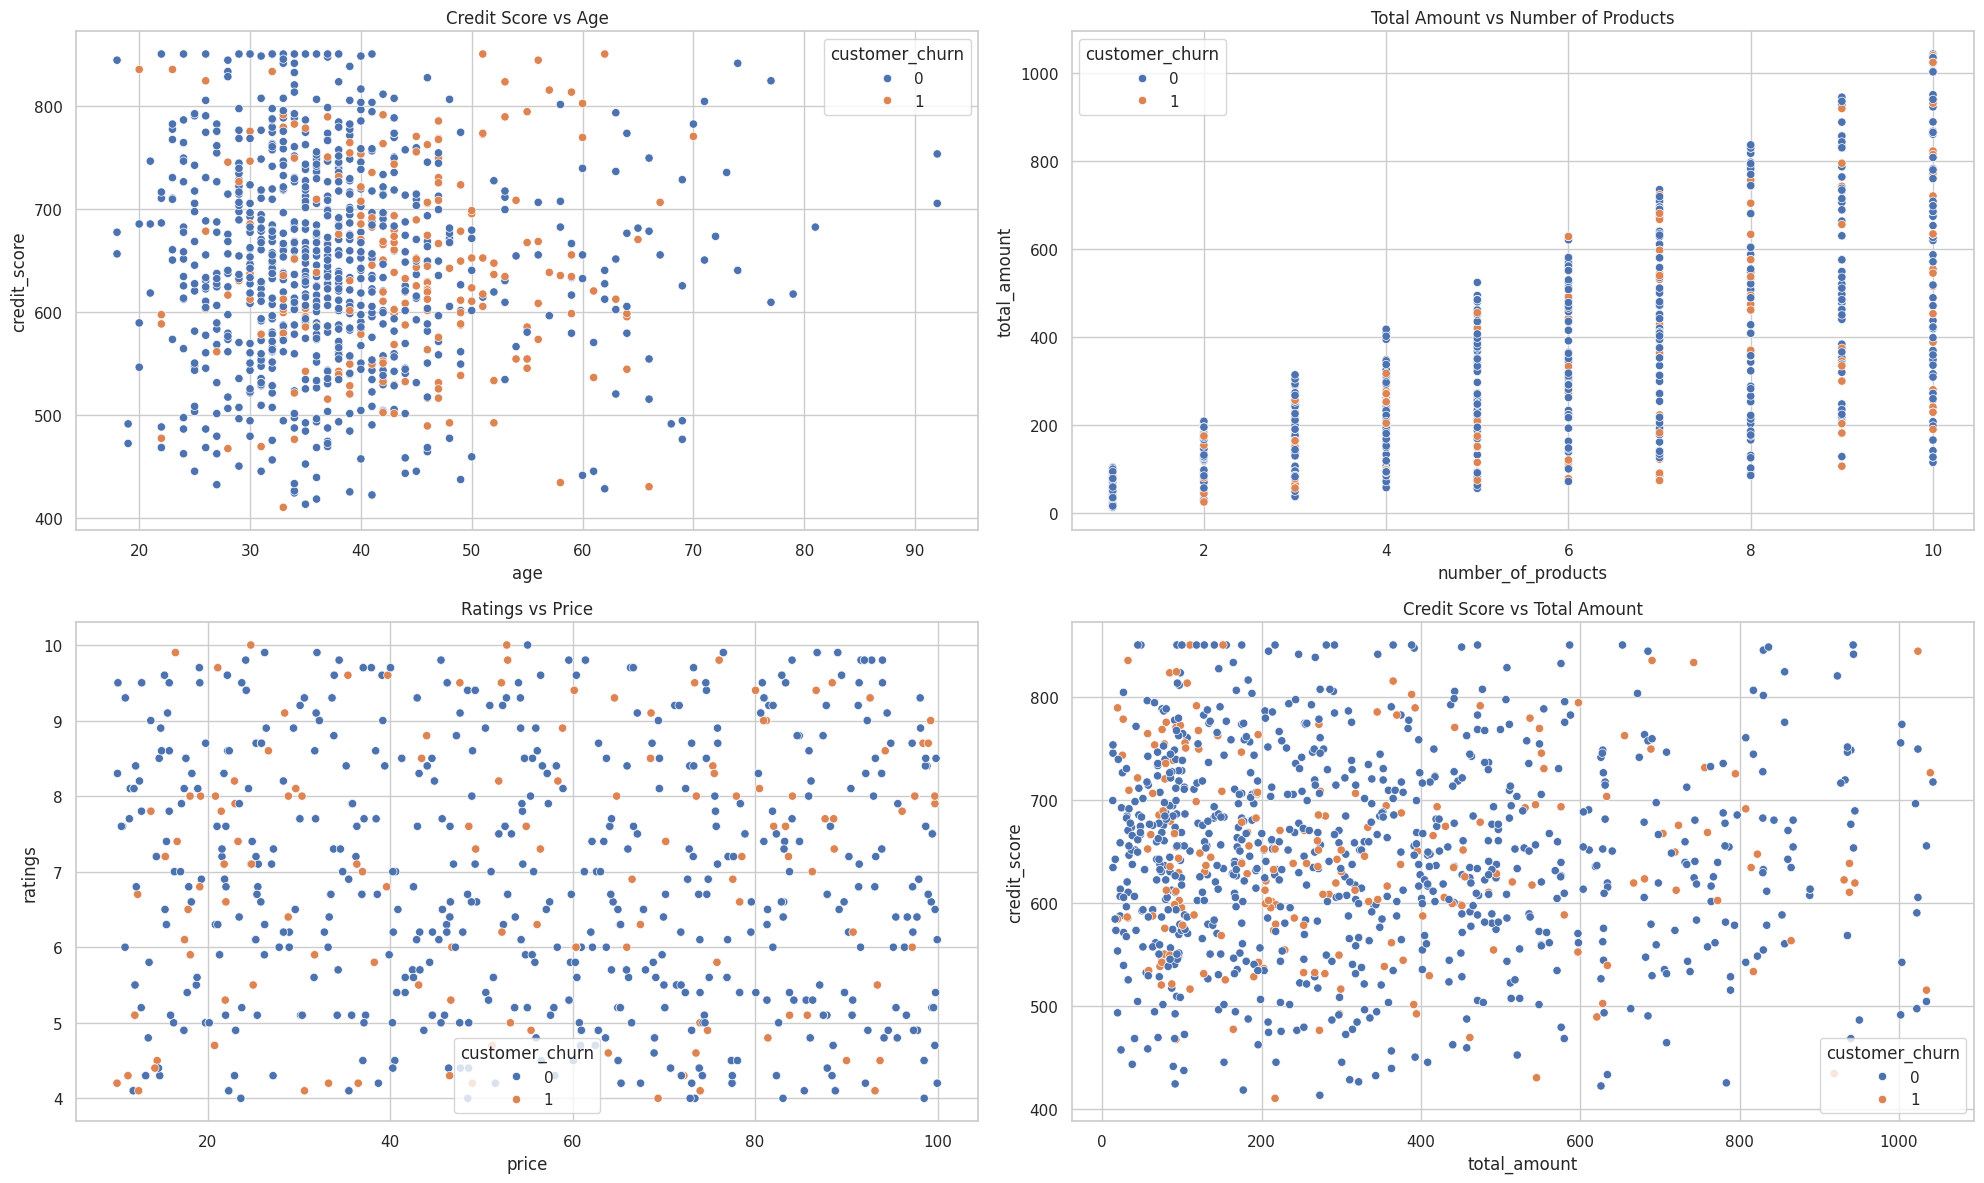

In [ ]:
# Set up the figure layout
plt.figure(figsize=(20, 12))

# Plotting bivariate relationships
# 1. Credit Score vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='credit_score', hue='customer_churn', data=data)
plt.title('Credit Score vs Age')

# 2. Total Amount vs Number of Products
plt.subplot(2, 2, 2)
sns.scatterplot(x='number_of_products', y='total_amount', hue='customer_churn', data=data)
plt.title('Total Amount vs Number of Products')

# 3. Ratings vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='price', y='ratings', hue='customer_churn', data=data)
plt.title('Ratings vs Price')

# 4. Credit Score vs Total Amount
plt.subplot(2, 2, 4)
sns.scatterplot(x='total_amount', y='credit_score', hue='customer_churn', data=data)
plt.title('Credit Score vs Total Amount')

plt.tight_layout()
plt.show()


In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'B'

In [ ]:
# Checking for missing values in each column of the dataset
missing_values = data.isnull().sum()
missing_values


branch                0
gender                0
age                   0
customer_type         0
credit_score          0
has_creditcard        0
is_active_member      0
product_category      0
number_of_products    0
tax_amount            0
price                 0
total_amount          0
ratings               0
customer_churn        0
dtype: int64

In [ ]:
# Applying one-hot encoding to the categorical variables
data = pd.get_dummies(data, columns=['branch', 'gender', 'customer_type', 'product_category'])

# Display the top 5 rows of the encoded dataset to confirm the encoding
data.head()


,age,credit_score,has_creditcard,is_active_member,number_of_products,tax_amount,price,total_amount,ratings,customer_churn,...,gender_Female,gender_Male,customer_type_Member,customer_type_Normal,product_category_Electronic accessories,product_category_Fashion accessories,product_category_Food and beverages,product_category_Health and beauty,product_category_Home and lifestyle,product_category_Sports and travel
0,33,746,1,1,4,12.5700,62.85,263.9700,8.7,0,...,True,False,True,False,False,False,True,False,False,False
1,28,639,1,0,9,34.8300,77.40,731.4300,4.5,0,...,False,True,True,False,False,False,True,False,False,False
2,49,626,1,0,4,8.0100,40.05,168.2100,9.7,0,...,False,True,True,False,False,False,False,False,False,True
3,39,838,1,0,3,12.7305,84.87,267.3405,7.4,0,...,True,False,True,False,False,True,False,False,False,False
4,35,786,1,0,4,9.7260,48.63,204.2460,7.6,0,...,False,True,False,True,False,True,False,False,False,False


In [ ]:
# Applying one-hot encoding to the categorical columns
data = pd.get_dummies(data, drop_first=True)

# Display the shape and some columns of the encoded dataset to confirm the transformation
data.shape
data.columns
data.head()




,age,credit_score,has_creditcard,is_active_member,number_of_products,tax_amount,price,total_amount,ratings,customer_churn,...,gender_Female,gender_Male,customer_type_Member,customer_type_Normal,product_category_Electronic accessories,product_category_Fashion accessories,product_category_Food and beverages,product_category_Health and beauty,product_category_Home and lifestyle,product_category_Sports and travel
0,33,746,1,1,4,12.5700,62.85,263.9700,8.7,0,...,True,False,True,False,False,False,True,False,False,False
1,28,639,1,0,9,34.8300,77.40,731.4300,4.5,0,...,False,True,True,False,False,False,True,False,False,False
2,49,626,1,0,4,8.0100,40.05,168.2100,9.7,0,...,False,True,True,False,False,False,False,False,False,True
3,39,838,1,0,3,12.7305,84.87,267.3405,7.4,0,...,True,False,True,False,False,True,False,False,False,False
4,35,786,1,0,4,9.7260,48.63,204.2460,7.6,0,...,False,True,False,True,False,True,False,False,False,False


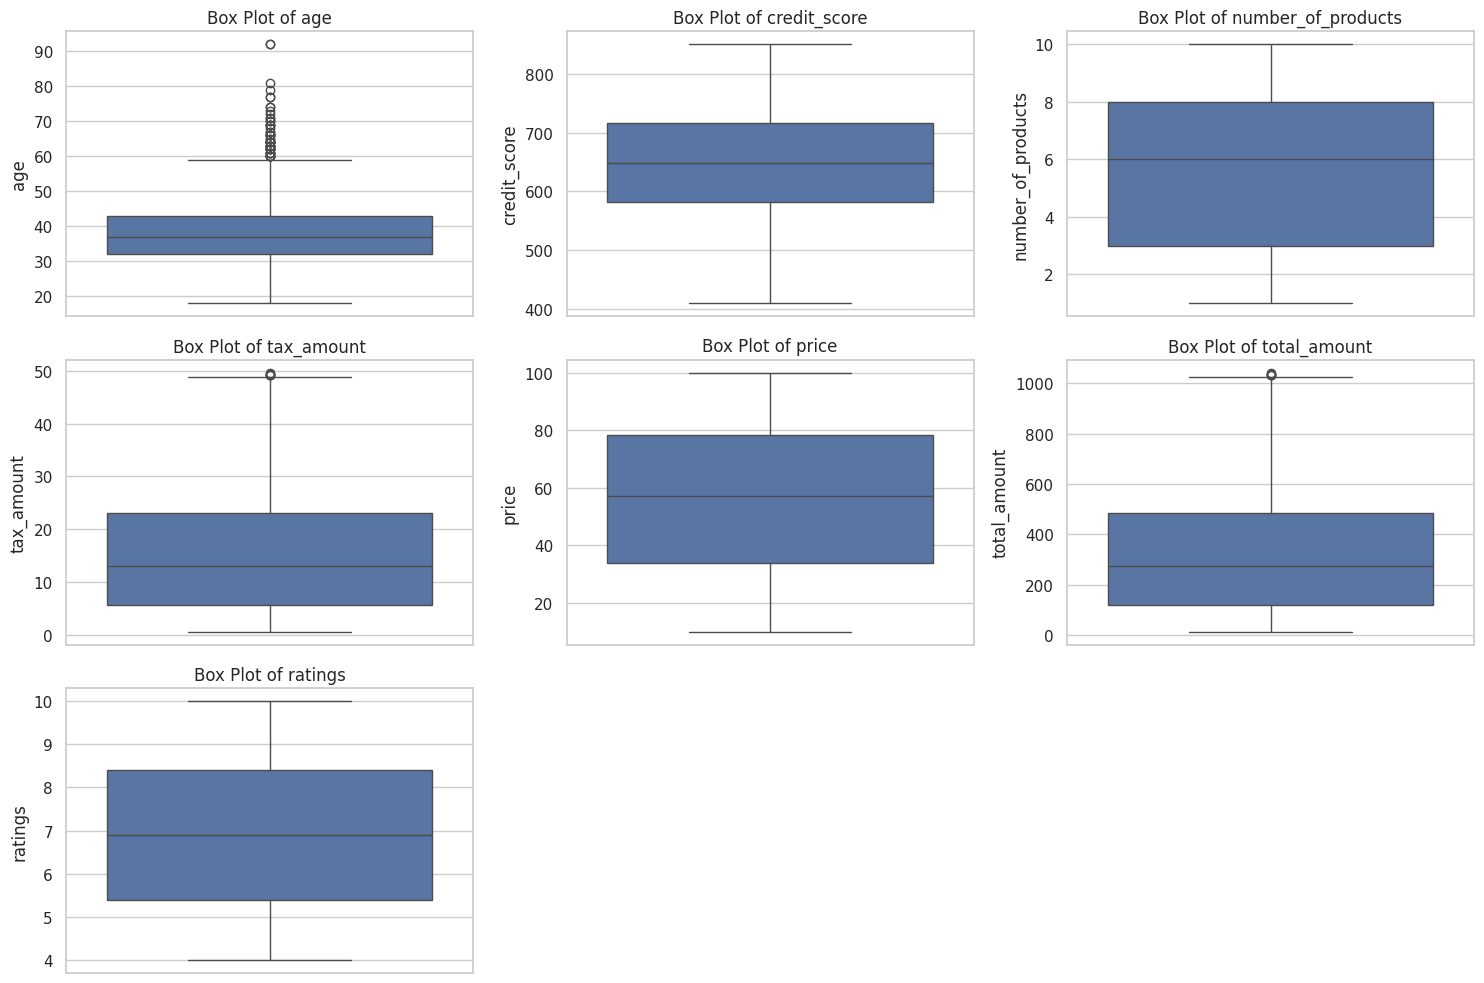

In [ ]:
# List of numerical columns to check for outliers
numerical_columns = ['age', 'credit_score', 'number_of_products', 'tax_amount', 'price', 'total_amount', 'ratings']

# Creating box plots for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


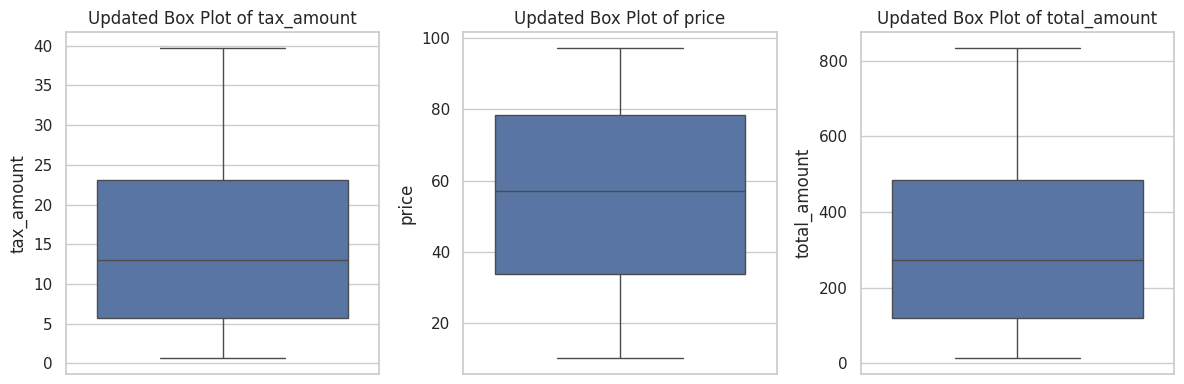

In [ ]:
# Defining the percentile threshold for capping
percentile_threshold = 95

# Applying capping to the 'Tax Amount', 'Price', and 'Total Amount' columns
for col in ['tax_amount', 'price', 'total_amount']:
    # Calculate the threshold value at the 95th percentile
    threshold_value = data[col].quantile(percentile_threshold / 100)
    # Cap values above the threshold
    data[col] = data[col].clip(upper=threshold_value)

# Verify the changes by plotting the updated box plots for the affected columns
plt.figure(figsize=(12, 4))

for i, col in enumerate(['tax_amount', 'price', 'total_amount']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Updated Box Plot of {col}')

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Creating scaler objects
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Selecting numerical columns for scaling (excluding categorical one-hot encoded columns)
numerical_columns = ['age', 'credit_score', 'number_of_products', 'tax_amount', 'price', 'total_amount', 'ratings']

# Applying Standardization
data_standardized = data.copy()
data_standardized[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Applying Min-Max Scaling
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

# Displaying the first few rows of the standardized and min-max scaled data
data_standardized_head = data_standardized.head()
data_minmax_scaled_head = data_minmax_scaled.head()

data_standardized_head, data_minmax_scaled_head





(        age  credit_score  has_creditcard  is_active_member  \
 0 -0.518863      1.020643               1                 1   
 1 -0.992106     -0.090332               1                 0   
 2  0.995514     -0.225310               1                 0   
 3  0.049028      1.975873               1                 0   
 4 -0.329566      1.435960               1                 0   
 
    number_of_products  tax_amount     price  total_amount   ratings  \
 0           -0.562983   -0.277157  0.249718     -0.277157  1.032625   
 1            1.171407    1.675684  0.803334      1.675684 -1.405138   
 2           -0.562983   -0.677201 -0.617805     -0.677201  1.613045   
 3           -0.909861   -0.263077  1.087562     -0.263077  0.278079   
 4           -0.562983   -0.526658 -0.291343     -0.526658  0.394163   
 
    customer_churn  ...  gender_Female  gender_Male  customer_type_Member  \
 0               0  ...           True        False                  True   
 1               0  ...   

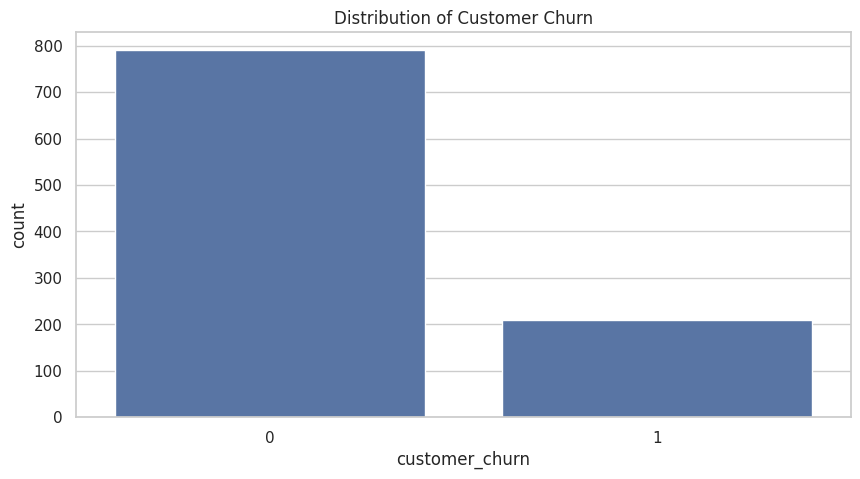

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of customer churn
plt.figure(figsize=(10, 5))
sns.countplot(x='customer_churn', data=data)
plt.title('Distribution of Customer Churn')



plt.show()




In [ ]:
from imblearn.over_sampling import SMOTE

# Creating an SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target variable
X = data.drop('customer_churn', axis=1)
y = data['customer_churn']

# Applying SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
class_distribution_resampled = y_resampled.value_counts()

class_distribution_resampled


customer_churn
0    790
1    790
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Using the resampled data (handling the previous step's continuation)
# But since SMOTE was not applied, we'll use the original 'data_encoded'
X = data.drop('customer_churn', axis=1)
y = data['customer_churn']

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Displaying the sizes of the train and test sets
X_train_shape, X_test_shape = X_train.shape, X_test.shape
X_train_shape, X_test_shape


((700, 22), (300, 22))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Logistic Regression model with default hyperparameters
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print(accuracy_logistic)
print(classification_report_logistic)


0.7833333333333333
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       232
           1       0.62      0.12      0.20        68

    accuracy                           0.78       300
   macro avg       0.70      0.55      0.54       300
weighted avg       0.75      0.78      0.72       300



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model with default hyperparameters
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)


print(accuracy_rf)
print(classification_report_rf)

0.78
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       232
           1       0.57      0.12      0.20        68

    accuracy                           0.78       300
   macro avg       0.68      0.55      0.53       300
weighted avg       0.74      0.78      0.72       300



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting Machine model with default hyperparameters
gbm_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gbm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_report_gbm = classification_report(y_test, y_pred_gbm)


print(accuracy_gbm)
print(classification_report_gbm)

0.7866666666666666
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       232
           1       0.59      0.19      0.29        68

    accuracy                           0.79       300
   macro avg       0.70      0.58      0.58       300
weighted avg       0.75      0.79      0.74       300



In [ ]:
from sklearn.neural_network import MLPClassifier

# Instantiate the Neural Network model (Multi-layer Perceptron classifier) with default hyperparameters
nn_model = MLPClassifier(random_state=42)

# Fit the model on the training data
nn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn)

print(accuracy_nn)
print(classification_report_nn)


0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       232
           1       0.38      0.04      0.08        68

    accuracy                           0.77       300
   macro avg       0.58      0.51      0.47       300
weighted avg       0.69      0.77      0.69       300



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ensure you have the correct number of features from your dataset
num_features = X_train.shape[1]

# Standardizing the features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    # First hidden layer with input shape specified
    Dense(128, input_shape=(num_features,), activation='relu'),
    # Second hidden layer
    Dense(64, activation='relu'),
    # Third hidden layer
    Dense(32, activation='relu'),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with an optimizer, loss function, and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy_nn = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy_nn:.4f}")


Epoch 1/50
70/70 [==============================] - 5s 14ms/step - loss: 0.5017 - accuracy: 0.7957 - val_loss: 0.5452 - val_accuracy: 0.7733
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 0.4638 - accuracy: 0.8014 - val_loss: 0.5068 - val_accuracy: 0.7767
Epoch 3/50
70/70 [==============================] - 1s 8ms/step - loss: 0.4303 - accuracy: 0.8071 - val_loss: 0.5293 - val_accuracy: 0.7800
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8200 - val_loss: 0.5163 - val_accuracy: 0.7767
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.3788 - accuracy: 0.8314 - val_loss: 0.5194 - val_accuracy: 0.7833
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3579 - accuracy: 0.8500 - val_loss: 0.5285 - val_accuracy: 0.7800
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3312 - accuracy: 0.8586 - val_loss: 0.5525 - val_accuracy: 0.7800
Epoch 8/50
70/70 [=

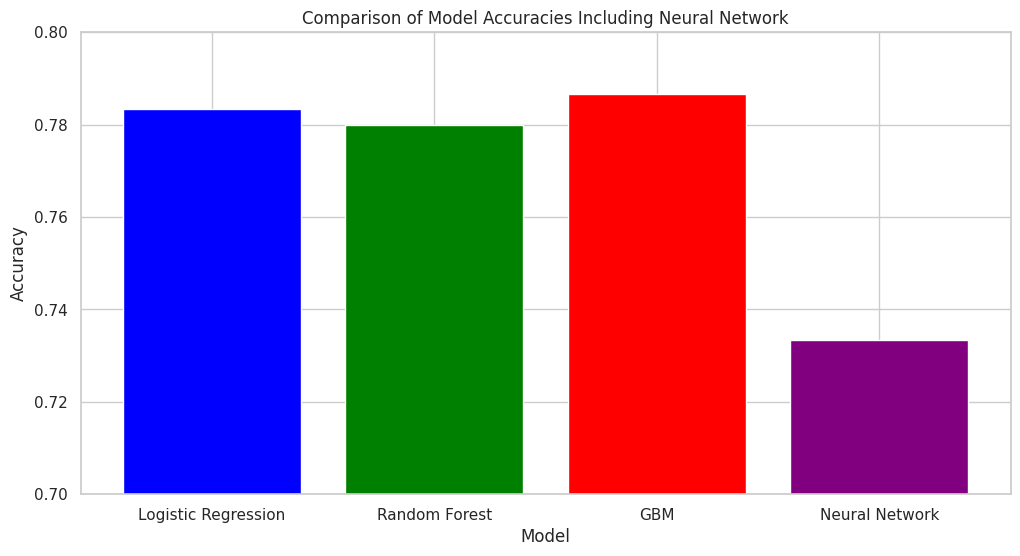

In [ ]:
import matplotlib.pyplot as plt

# Updated list of model names to include Neural Network
model_names_updated = ['Logistic Regression', 'Random Forest', 'GBM', 'Neural Network']

# Updated list of accuracies to include the provided Neural Network accuracy

accuracies_updated = [accuracy_logistic, accuracy_rf, accuracy_gbm, test_accuracy_nn]

# Creating the updated bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names_updated, accuracies_updated, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Including Neural Network')
plt.ylim(0.7, 0.8)  # Adjust as necessary to fit the range of your actual accuracies
plt.show()
